In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.ticker as ticker
import random

In [2]:
def create_grid(scale):
    
    x_ratio = 4
    y_ratio = 3
    
    scale_options = [i for i in range(1, 14)]
    if scale not in scale_options:
        print('%s is not an option. Available options are %s' % (scale, str(scale_options)))

    x = x_ratio * scale
    y = int(y_ratio * scale)
    
    nums = [1, 2, 3, 4, 5, 6]
    grid_numbers = [[random.choice(nums) for x in range(x)] for y in range(y)]
    return grid_numbers

In [3]:
grid = create_grid(4)

In [4]:
ALPHABET = [chr(i) for i in range(65, 91)] + [chr(i) + chr(i) for i in range(65, 91)]

In [5]:
def get_label(i ,pos=None):
    return ALPHABET[int(i)]

In [6]:
def render_grid(numbers, colors = False, linewidth = 5, fontsize='xx-large'):
    
    x = len(numbers[0])
    y = len(numbers)
    
    x_ticks = [i - 0.5 for i in range(0, (x + 1))]
    y_ticks = [i - 0.5 for i in range(0, (y + 1))]

    plt.rcParams['figure.figsize'] = [11, 8.5]

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, x - 0.5)
    ax.set_ylim(-0.5, y - 0.5)

    if colors:
        ax.matshow(numbers, cmap=plt.cm.Blues)

    #ax.tick_params(labeltop=True, labelright=True, length=0)

    ax.xaxis.set_major_locator(ticker.FixedLocator(x_ticks))
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.xaxis.set_minor_formatter(ticker.FuncFormatter(get_label))

    ax.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_formatter(ticker.FuncFormatter(get_label))

    for j, row in enumerate(numbers):
        for i, number in enumerate(row):
            char = str(number)
            ax.text(i, j, char, va='center', ha='center', fontsize='xx-large')
        

    ax.grid(color='black', linewidth=5)
    plt.gca().set_aspect('equal')
    if colors: 
        filename = 'color_by_number_key.pdf'
    else:
        filename = 'color_by_number.pdf'
    plt.savefig(filename, format='pdf', orientation = 'landscape')

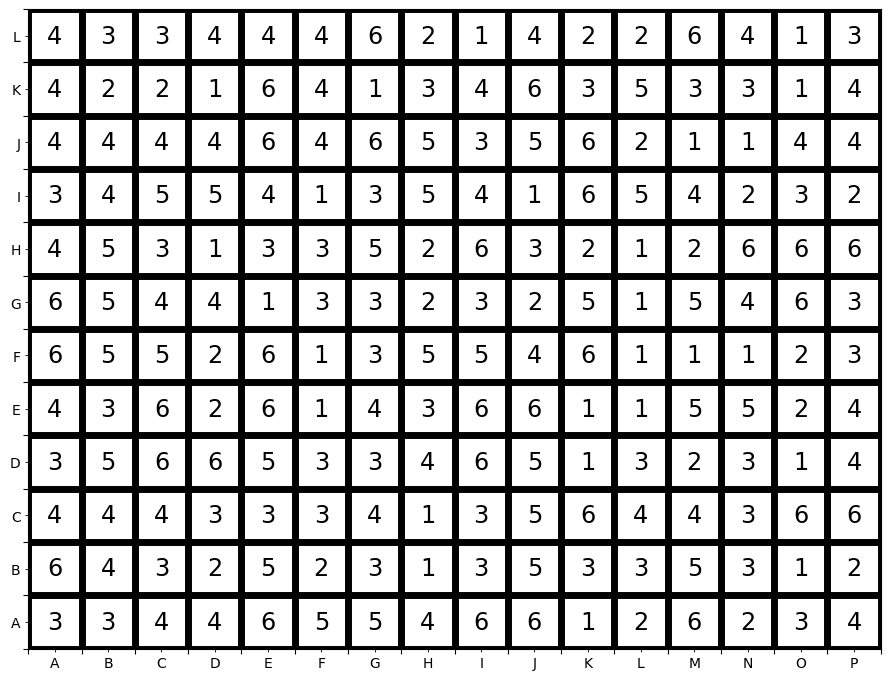

In [7]:
render_grid(grid)

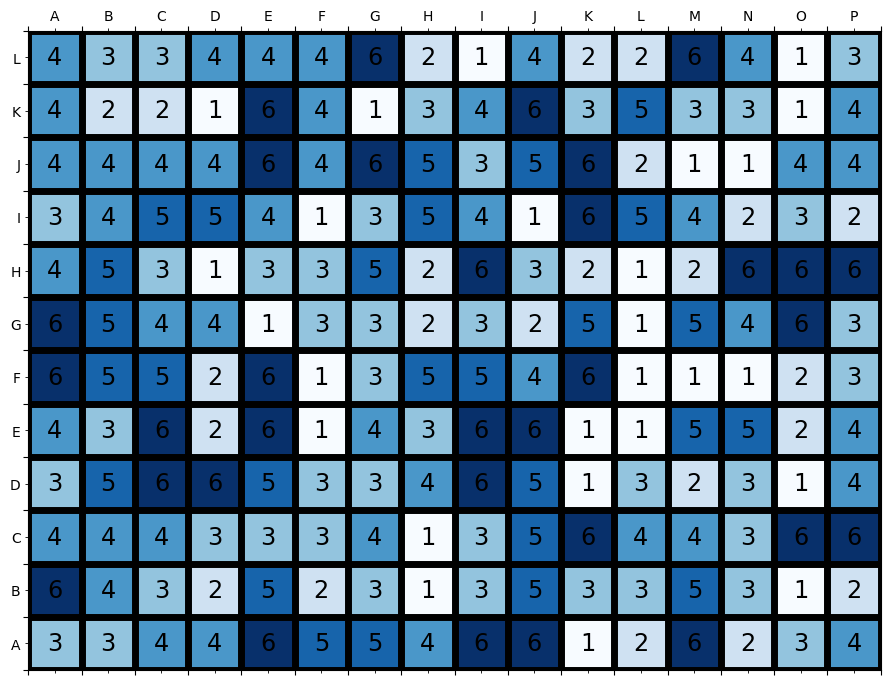

In [8]:
render_grid(grid, True)